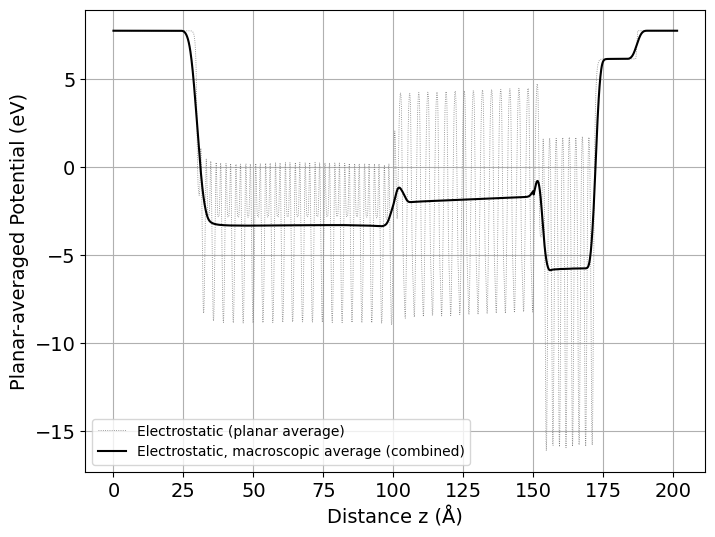

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === Define all three file paths ===
file1 = '/global/cfs/cdirs/m3578/chenbo/band_aligenment/PbSe_Al2Se3_Al_111_001_111_20_8_8/MACROSCOPIC_AVERAGE_3.53413.dat'
file2 = '/global/cfs/cdirs/m3578/chenbo/band_aligenment/PbSe_Al2Se3_Al_111_001_111_20_8_8/MACROSCOPIC_AVERAGE_3.25352.dat'
file3 = '/global/cfs/cdirs/m3578/chenbo/band_aligenment/PbSe_Al2Se3_Al_111_001_111_20_8_8/MACROSCOPIC_AVERAGE_2.33892.dat'

macro_column_names = ['Distance (A)', 'Macroscopic-Average', 'Planar-Average']

# === Load all three datasets ===
data1 = pd.read_csv(file1, delim_whitespace=True, comment='#', names=macro_column_names)
data2 = pd.read_csv(file2, delim_whitespace=True, comment='#', names=macro_column_names)
data3 = pd.read_csv(file3, delim_whitespace=True, comment='#', names=macro_column_names)

# === Define slice regions ===
slice_1 = data1['Distance (A)'] < 100
slice_2 = (data2['Distance (A)'] >= 100) & (data2['Distance (A)'] < 150)
slice_3 = data3['Distance (A)'] >= 150

# === Concatenate the three macroscopic average segments ===
combined_macro = np.hstack((
    data1['Macroscopic-Average'][slice_1],
    data2['Macroscopic-Average'][slice_2],
    data3['Macroscopic-Average'][slice_3]
))

# === Assume the z-distance is from the first dataset ===
z_combined = np.hstack((
    data1['Distance (A)'][slice_1],
    data2['Distance (A)'][slice_2],
    data3['Distance (A)'][slice_3]
))

# === Plot ===
plt.figure(figsize=(8, 6))

# (Optional) Plot the planar-average from the first file for reference
plt.plot(data1['Distance (A)'], data1['Planar-Average'], 
         label='Electrostatic (planar average)', color='grey', ls='dotted', lw=0.6)

# Plot the combined macroscopic average
plt.plot(z_combined, combined_macro, 
         label='Electrostatic, macroscopic average (combined)', color='black')

# === Aesthetics ===
plt.xlabel('Distance z (Å)', fontsize=14)
plt.ylabel('Planar-averaged Potential (eV)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)

# === Save and show ===
output_path = os.path.join(os.path.dirname(file1), 'pot_combined.png')
plt.savefig(output_path, transparent=True, dpi=600)
plt.show()
